In [6]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras
import numpy as np
import os,random,glob
import PIL


# For augmenting the dataset and saving the images in the same directory

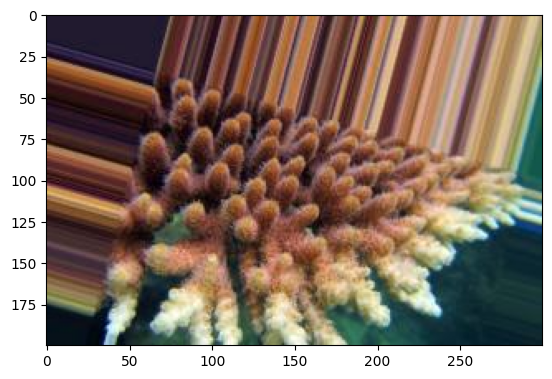

In [27]:
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from tensorflow.keras.utils import img_to_array

datagen=ImageDataGenerator(rotation_range=10,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True,
                           shear_range=0.1,
                           zoom_range=0.50,
                           fill_mode='nearest')

base_dir=r'Bleached Corals and Healthy Corals Classification\Training\healthy_corals'
output_dir=r'Bleached Corals and Healthy Corals Classification\Training\healthy_corals'

filenames=os.listdir(base_dir)

for filename in filenames:
    try:
        img=cv2.imread(os.path.join(base_dir,filename))
        plt.imshow(img)
        x=img_to_array(img)
        x=x.reshape((1,)+x.shape)
        i=0
        for batch in datagen.flow(x,batch_size=1,save_to_dir=output_dir,save_prefix=filename.split('.')[0],save_format='jpg'):
            i+=1
            if i>=1:
                break
              
     
    except Exception as e:
        print(f"There was an error processing image: {e}")
        continue

In [87]:
def walk_through_directory(dir_path):
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.'")

In [88]:
walk_through_directory(r"Bleached Corals and Healthy Corals Classification\Training")

There are 2 directories and 0 images in 'Bleached Corals and Healthy Corals Classification\Training.'
There are 0 directories and 3880 images in 'Bleached Corals and Healthy Corals Classification\Training\bleached_corals.'
There are 0 directories and 3504 images in 'Bleached Corals and Healthy Corals Classification\Training\healthy_corals.'


In [89]:
walk_through_directory(r"Bleached Corals and Healthy Corals Classification\Testing")

There are 2 directories and 0 images in 'Bleached Corals and Healthy Corals Classification\Testing.'
There are 0 directories and 485 images in 'Bleached Corals and Healthy Corals Classification\Testing\bleached_corals.'
There are 0 directories and 438 images in 'Bleached Corals and Healthy Corals Classification\Testing\healthy_corals.'


# Rescaling all the images in the test,train and valid

In [90]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
valid_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(r"Bleached Corals and Healthy Corals Classification\Training",
                                                 target_size=(128,128),
                                                 batch_size=64,
                                                 seed=123,
                                                 class_mode="categorical")
valid_generator=valid_datagen.flow_from_directory(r"Bleached Corals and Healthy Corals Classification\Validation",
                                                 target_size=(128,128),
                                                 batch_size=64,
                                                 seed=123,
                                                 class_mode="categorical")
test_generator=test_datagen.flow_from_directory(r"Bleached Corals and Healthy Corals Classification\Testing",
                                                 target_size=(128,128),
                                                 batch_size=64,
                                                 seed=123,
                                                 class_mode="categorical")

Found 7384 images belonging to 2 classes.
Found 985 images belonging to 2 classes.
Found 923 images belonging to 2 classes.


In [91]:
print(len(train_generator))
print(len(valid_generator))
print(len(test_generator))

116
16
15


In [92]:
c=train_generator.class_indices
classes=list(c.keys())
classes


['bleached_corals', 'healthy_corals']

# Making the CNN Model

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D

model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Conv2D(128,(3,3),activation='relu'),
    Dropout(0.5),
    Flatten(),
    Dense(2,activation='softmax')])

In [83]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 dense_34 (Dense)            (None, 61, 61, 32)        2080      
                                                                 
 dense_35 (Dense)            (None, 61, 61, 64)        2112      
                                                                 
 conv2d_35 (Conv2D)          (None, 59, 59, 128)       73856     
                                                      

In [94]:
from tensorflow.keras.optimizers import Adam
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [95]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(monitor='val_loss',min_delta=0.001,verbose=1,mode='auto',patience=5)

hisotry=model.fit(train_generator,
         steps_per_epoch=len(train_generator),
         epochs=45,
         validation_data=valid_generator,
         callbacks=[early_stopping])

Epoch 1/45
116/116 [==============================] - 74s 630ms/step - loss: 0.6207 - accuracy: 0.6620 - val_loss: 0.6226 - val_accuracy: 0.6467
Epoch 2/45
116/116 [==============================] - 78s 670ms/step - loss: 0.5560 - accuracy: 0.7163 - val_loss: 0.5755 - val_accuracy: 0.6944
Epoch 3/45
116/116 [==============================] - 85s 728ms/step - loss: 0.5526 - accuracy: 0.7161 - val_loss: 0.5297 - val_accuracy: 0.7330
Epoch 4/45
116/116 [==============================] - 84s 730ms/step - loss: 0.5092 - accuracy: 0.7472 - val_loss: 0.5463 - val_accuracy: 0.7320
Epoch 5/45
116/116 [==============================] - 89s 767ms/step - loss: 0.5019 - accuracy: 0.7556 - val_loss: 0.4828 - val_accuracy: 0.7655
Epoch 6/45
116/116 [==============================] - 93s 801ms/step - loss: 0.4779 - accuracy: 0.7652 - val_loss: 0.4718 - val_accuracy: 0.7766
Epoch 7/45
116/116 [==============================] - 97s 834ms/step - loss: 0.4759 - accuracy: 0.7714 - val_loss: 0.4948 - val_ac

In [96]:
loss,accuracy=model.evaluate(test_generator)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

15/15 [==============================] - 2s 123ms/step - loss: 0.4742 - accuracy: 0.7768
Loss:  0.47424498200416565
Accuracy:  0.7768147587776184


In [99]:
def plot_loss_curves(history):
    
    loss=hisotry.history['loss']
    val_loss=hisotry.history['val_loss']
    
    accuracy=hisotry.history['accuracy']
    val_accuracy=hisotry.history['val_accuracy']
    epochs=range(len(hisotry.history['loss']))
    plt.plot(epochs,loss,label='training_loss')
    plt.plot(epochs,val_loss,label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs,accuracy,label='training_accuracy')
    plt.plot(epochs,val_accuracy,label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

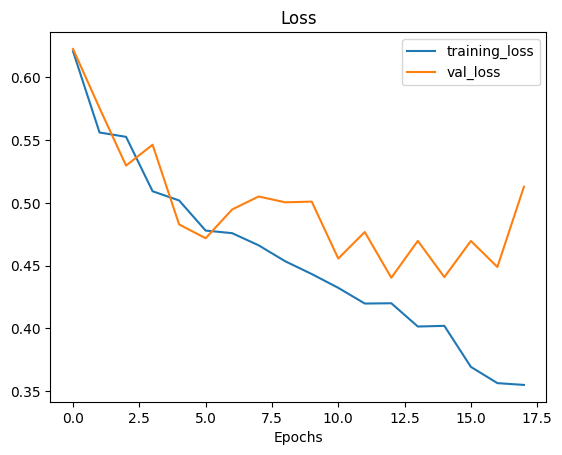

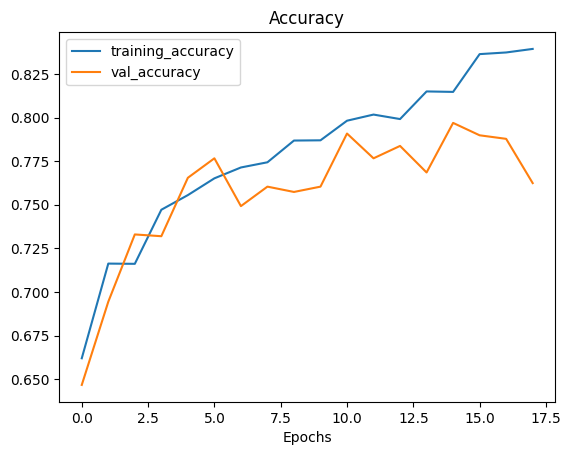

In [100]:
plot_loss_curves(hisotry)#plotting the Graph to check the training and validation accuracy.
#Normally we check if the curve of validation accuracy is above training accuracy In this there is slight overfitting but better than the models compiled and trained earlier

In [101]:
model.save("CNN_model-1_CoralsClassification.h5")

# Convert h5 file into tflite file

In [102]:
import tensorflow as tf
model=tf.keras.models.load_model("CNN_model-1_CoralsClassification.h5")
tflite_converter=tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model=tflite_converter.convert()
open("CNN_model-1-CoralsClassification_tflite.tflite","wb").write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Aneesh\AppData\Local\Temp\tmpkwo24mdl\assets


INFO:tensorflow:Assets written to: C:\Users\Aneesh\AppData\Local\Temp\tmpkwo24mdl\assets


1144560

# Plotting a Confusion Matrix to check the false and true predicted values

In [114]:
import sklearn
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels for the test data
y_true = test_generator.classes

# Build the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

15/15 [==============================] - 7s 459ms/step
[[325 160]
 [284 154]]


15/15 [==============================] - 2s 122ms/step


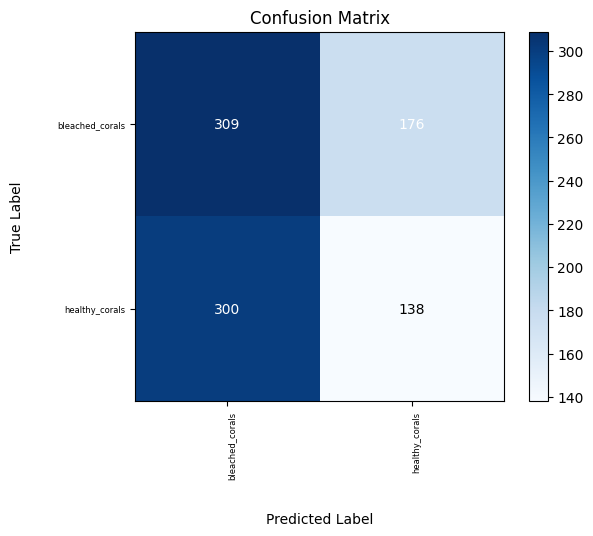

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = model.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels for the test data
y_true = test_generator.classes

# Build the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Define the class names
class_names = list(test_generator.class_indices.keys())

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and tick labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names,fontsize=6)
ax.set_yticklabels(class_names,fontsize=6)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white" if conf_matrix[i, j] > np.max(conf_matrix) / 2 else "black")

# Set title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label", labelpad=20)#,pad=20)
ax.set_ylabel("True Label", labelpad=20)#,pad=20)

# Adjust the position of the axis labels
ax.xaxis.set_label_coords(0.5, -0.30)
ax.yaxis.set_label_coords(-0.30, 0.5)

# Show the plot
plt.show()

In [103]:
def load_and_prep_image(filename,img_shape=128,scale=True):
    
    img=tf.io.read_file(filename)
    
    img=tf.image.decode_jpeg(img)
    img=tf.image.resize(img,[img_shape,img_shape])
    if scale:
        return img/255.0
    else:
        return img

# Plotting the prediction of the image randomly choosen

In [111]:
def pred_and_plot(model,filename,class_names):
    
    img=load_and_prep_image(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    pred_class=class_names[pred.argmax()]
    
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 28ms/step


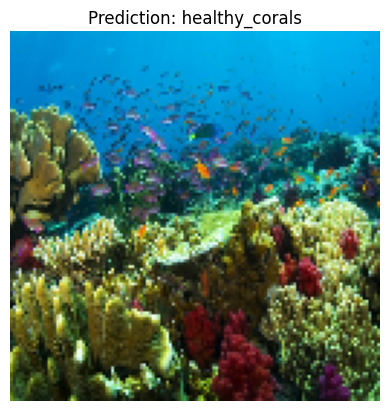

In [118]:
pred_and_plot(model,"Pred_samples/healthy_internet.jpg",classes)